In [105]:
import numpy as np
import matplotlib.pyplot as plt

In [88]:
points = np.vstack(((np.random.randn(150, 2) * 0.75 + np.array([1, 0])),
                  (np.random.randn(50, 2) * 0.25 + np.array([-0.5, 0.5])),
                  (np.random.randn(50, 2) * 0.5 + np.array([-0.5, -0.5]))))

In [89]:
#so we are going to use 3 different clusters, tune this too 
print(points.shape)

(250, 2)


In [90]:
def distance_mean_points(means,points):
    distances = np.sqrt(np.sum(np.square(means[:,np.newaxis,:]-points),axis=2))
    return np.argmin(distances,axis=0)

In [91]:
distance_mean_points(means,points)

array([0, 0, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 2, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2,
       1, 0, 0, 1, 0, 0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 1,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0,
       2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [92]:
def initialize_mean(points,k,iterate=2):
    for i in range(iterate):
        np.random.shuffle(points)
    return points[:k]

In [93]:
def new_means(points,means_args,means):
    unique_array = np.unique
    return np.array( [ np.mean(points[means_args==m],axis=1) for m in means.shape[0]])

In [94]:
def move_centroids(points, closest, centroids):
    """returns the new centroids assigned from the points closest to them"""
    clusters = np.array([points[closest==k] for k in range(centroids.shape[0])])
    means = np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])
    return means,clusters

In [99]:
def get_clusters(points,K,MAX_ITERATION):
    index = 0
    means = initialize_mean(points,K)
    while True:
        closest_distance_mask = distance_mean_points(means,points)
        means,clusters = move_centroids(points,closest_distance_mask,means)

        if index==MAX_ITERATION:
            return means,clusters
        index= index+1

In [127]:
K=3
MAX_ITERATION = 5
means,clusters = get_clusters(points,K,MAX_ITERATION)


(47, 2)
(89, 2)
(114, 2)


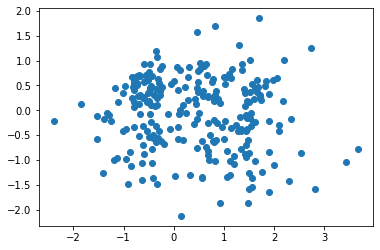

In [119]:
#lets see how our data was at the beginning
%matplotlib inline
plt.scatter(points[:, 0], points[:, 1])

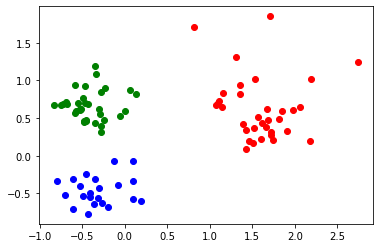

In [144]:
def plot_k(k,clusters):
    fig,axes = plt.subplots()
    colors= ['b','g','r','c','m','y','k','w']
    for i in range(0,k):
        colorIndex = i%len(colors)
        axes.scatter( clusters[i][:,0],clusters[i][:,1], c=colors[colorIndex])
    plt.show()
    
plot_k(K,clusters)

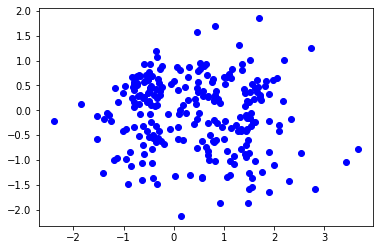

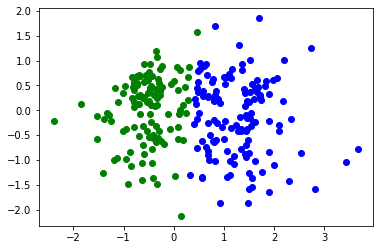

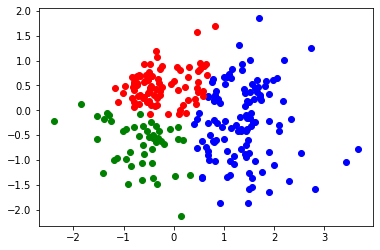

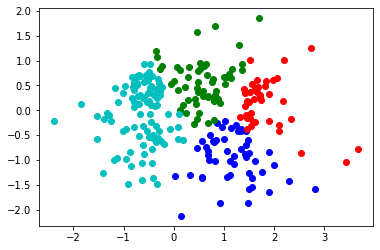

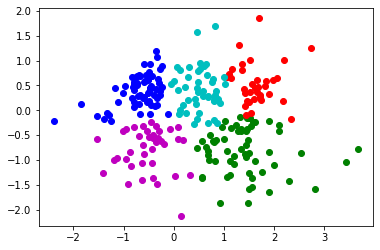

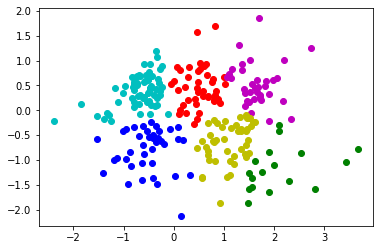

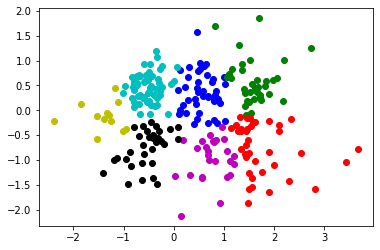

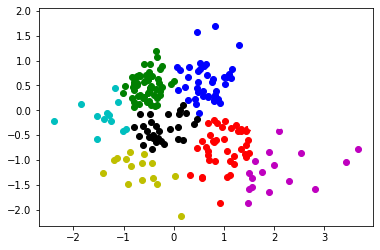

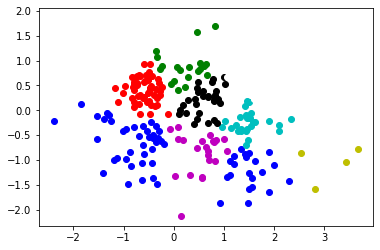

In [145]:
#we need more here! 
# what we have to do now? 
#let us use different K
for i in range(1,10):
    means,clusters = get_clusters(points,i,MAX_ITERATION=100)
    plot_k(i,clusters)